We now study methods and functions in details. Methods are essentially functions built into objects. So methods are special functions designed specifically to work with their own types of objects. We have seen methods associated with strings, lists, dictionaries, and tuples before. Usually methods are in the form of this syntax: object.method(argument1, argument2,...argumentn). Remember for methods, you can always click on the 'tab' key to see what kind of methods are assocciated with the objects. Below are some examples of methods we have seen:

In [1]:
ex1 = [1,2,3,4,5,5,5]
ex1.append('sdufs') # note that the append() methods for list can only take one argument
print(ex1) 
print(ex1.count(5))
print(ex1.index(1)) # index will return the index of whatever element is placed as an argument (if the the element is not in the list an error is returned)
ex1.insert(2,'inserted')
print(ex1)
ex1.remove('sdufs')
print(ex1)

[1, 2, 3, 4, 5, 5, 5, 'sdufs']
3
0
[1, 2, 'inserted', 3, 4, 5, 5, 5, 'sdufs']
[1, 2, 'inserted', 3, 4, 5, 5, 5]


In [4]:
ex2 = 'Hello world'
print(ex2.isalnum()) # judge if it's alphanumeric
print(ex2.isalpha())
print(ex2.islower())
print(ex2.isspace())
print(ex2.istitle()) # judge if it's a title-cased string and there is at least one character
print(ex2.endswith('d'))

False
False
False
False
False
True


In [5]:
help(ex1.count) # this is how you should get help for a method associated with a list

Help on built-in function count:

count(...) method of builtins.list instance
    L.count(value) -> integer -- return number of occurrences of value



We now focus on how to write user-defined functions. We first write some user-defined functions and then study the 'return' statements. You can also add **docstrings** within a function to help job your memory later if you do not remember why you write this function and its associated details. Doctrings are basically like comments/annotations/instructions for the function itself. 

First, we create a function that does nothing (see below), the 'pass' statement is essentially a placeholder if you haven't written the function body:

In [ ]:
def name_of_function():
    pass
name_of_function() # this function does nothing

Next let's see an example of docstrings:

In [7]:
def blah(arg1,arg2):
    '''
    Put in your docstring here so in the future you can reference it!
    '''
    print(arg1,arg2)
blah(ex1, ex1)

[1, 2, 'inserted', 3, 4, 5, 5, 5] [1, 2, 'inserted', 3, 4, 5, 5, 5]


In [5]:
def hello(name):
    print('Hello, '+str(name)+', you are awesome!')
hello('Peter')

Hello, Peter, you are awesome!


In [6]:
def addnum(num1,num2):
    return num1+num2 # I am not printing
w=addnum(2,3)
print(w)
w1=addnum('one','two') # we don't specify the data type so the functions are flexible
print(w1)

5
onetwo


In [7]:
def is_prime(num):
    for i in range(2,num):
        if num % i==0:
            print('The current number ' + str(num) + ' is not a prime number!')
            break
    else: # you can use the else statement on the same level with a for-loop in Python
        print('This is a prime!')
is_prime(9)
is_prime(107)

The current number 9 is not a prime number!
This is a prime!


We now study the **lambda expressions**, which is a compact way of writing simple functions in Python. It is one of Python's most useful tools, which allows programmers to quickly create 'anonymmous' functions without explicitly using the 'def' statement. To be more specific, lambda's body is a single expression, not a block of statements. The lambda's body is similar to what we would put in a 'def' body's return statement. We simply type the result as an expression instead of explicitly returning it. Because it is limited to an expression, a lambda is less general than a 'def' statement. So lambda expressions are usually used for very easy functions.


In [8]:
def square(num):
    Result=num**2
    return Result
print(square(4))
square = lambda num: num**2 # this is the lambda expression (essentially a one-line condensed function)
print(square(3))

16
9


Above, we see a user-defined function. Below is a rephrasing of the example above using the lambda expression. 

In [9]:
even_check=lambda num: num%2==0 
print(even_check(2))
print(even_check(25))

True
False


Here are some additional examples:

In [10]:
string_pick = lambda s: s[0]
print(string_pick('Hello'))
print(string_pick('World'))

H
W


In [11]:
adder = lambda x,y: x+y # the lambda expression is able to take more than one argument
print(adder(2,3))

5


Speaking of functions, we always need to understand the concepts of **scope** and **namespace**. This is true because in almost all coding languages, you have to have these fundamental concepts to be well-defined. When you create a variable name in Python, the name is stored in something called a 'namespace'. Variable names also have a scope, which determines the visibility of that variable name to other parts of your code. Generally speaking, name assignments will create or change local names by default. Name references search (at most) 4 scopes: local, global, enclosing functions and built-in. Specifically:

    1) Local scopes refer to names assigned in any way within a function (in a 'def' statement or a lambda expression) and they cannot be declared global in that function. 
    2) Enclosing function local scopes refer to names in the local scope of any and all enclosing functions, from inner to outer. 
    3) Global scopes refer to names assigned at the top-level of a module file, or declared global in a 'def' within a file. 
    4) Built-in scopes refer to names preassigned in the built-in names modules. 

Below we use some examples for illustrations:

In [12]:
x=25 # global
def printer():
    x=50 # local
    return x
print(x) # 25
print(printer()) #50

25
50


In [13]:
var='This is a global name' # global
def greet():
    var='Sam' # enclosing function
    def Hello():
        print("Hello " + var)
    Hello()
greet()

Hello Sam


The above code serves as a good example of how Python deals with scope. Note that within the function greet(), we have another function called Hello(). The idea here is that Python first looks for a local scope for the 'var' variable as a starter. Since 'var' is not defined anywhere in the Hello() function, Python starts to search for enclosing functions from the outer part of the greet() function. Now Python found the value of 'var', it will bring that value back inside. Below is another good example for function scopes:

In [14]:
y=1
def changefunc(y):
    print('y is '+ str(y))
    y=148
    print('changed local y to ' + str(y))
changefunc(y)
print('y is still '+str(y))
    

y is 1
changed local y to 148
y is still 1


The above set of codes gives another good example. While we are in the function, the value of y gets changed from the global value to the local value. Once we are outside the function, the global value is respected again. The rule here is very similar to SAS. 

To declare global variables, we can use the global statement. Below is an example. The function below actually changes the value globally. 

In [15]:
w=89
print('Before calling the function, the value of w is ' + str(w))
def func2():
    global w # whatever we do our change will happen to w
    print('The function is now using the global variable ' + str(w))
    print('Because of global w is: ' + str(w))   
    w=2
    print('Run this function, and we changed the global w to ' + str(w))
func2()
print('Now the value of w outside the function is given by ' + str(w))

Before calling the function, the value of w is 89
The function is now using the global variable 89
Because of global w is: 89
Run this function, and we changed the global w to 2
Now the value of w outside the function is given by 2


A useful tool is to use the globals() and locals() function to see the scope of the variables in the session. 

In [16]:
print('global objects include the following: \n' + str(globals()) + '\n\n')
print('lobal objects include the following: \n' + str(locals()) + '\n\n')

global objects include the following: 
{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "ex1 = [1,2,3,4,5,5,5]\nex1.append('sdufs') # note that the append methods for list can only take one argument\nprint(ex1) \nprint(ex1.count(5))\nprint(ex1.index(1)) # index will return the index of whatever element is placed as an argument (if the the element is not in the list an error is returned)\nex1.insert(2,'inserted')\nprint(ex1)\nex1.remove('sdufs')\nprint(ex1)", "ex2 = 'Hello world'\nprint(ex2.isalnum()) # judge if it's alphanumeric\nprint(ex2.isalpha())\nprint(ex2.islower())\nprint(ex2.isspace())\nprint(ex2.istitle()) # judge if it's a title-cased string and there is at least one character\nprint(ex2.endswith('d'))", 'help(ex1.count) # this is how you should get help for 

There are tricks involved with building functions. For example, dictionaries can be very useful when it comes to function buildings. For example, if we want to write a function that accepts a string and calculate the number of upper case letters and lower case letters, we can actually use dictionaries to achieve such goals. See code below:

In [18]:
def uplow(s):
    dic={'upper':0, 'lower':0}
    for i in s:
        if i.isupper():
            dic["upper"]=dic["upper"]+1
        elif i.islower():
            dic["lower"]=dic["lower"]+1
        else:
            pass
    print('The original string is '+str(s))
    print('Number of upper case characters: ', dic['upper'])
    print('Number of lower case characters: ', dic['lower'])
s1='Glenn Gould is one of the greatest pianists in the 20th century.'
uplow(s1)
    

The original string is Glenn Gould is one of the greatest pianists in the 20th century.
Number of upper case characters:  2
Number of lower case characters:  48


Another trick while building functions is to use empty objects. For example, suppose we want to write a Python function that takes a list and returns a new list with unique elements in the original list. Then in this case we can start with an empty list and iterate the process by keep appending until all the unique elements are found. 

In [19]:
def unique_list(lis):
    x=[]
    for j in lis:
        if j not in x:
            x.append(j)
    return(x)
lis=[1,2,3,3,'a','a','b','c',1]
print(unique_list(lis))

[1, 2, 3, 'a', 'b', 'c']


Another trick is to use the shortcut such as += etc. to do operations in a function in an iterative way, starting from a null position. For instance, suppose we want to create a function that concatenates all the elements (numeric) in a list. We can then use the += to achieve this goal.

In [2]:
def list_mul(lis):
    total=lis[0]
    for j in lis:
        total*=j # same as total=total*j
    return total
a=[1,2,3,4,5]
list_mul(a)

120

In [21]:
def list_addup(lis):
    total=lis[0]
    for j in lis:
        total+=j
    return total
b=[6,7,8,9,10]
list_addup(b)

46

Lastly, remember that many packages may contain useful functions that can be reused, so you don't always have code everything out. As an example, let's now introduce a function called Image() from the Ipython.display module. What this function does is basically copy a picture from the internet and display it on the Python jupyter notebook. It's very simple. And it's very useful for illustrative purposes. Below is an example:

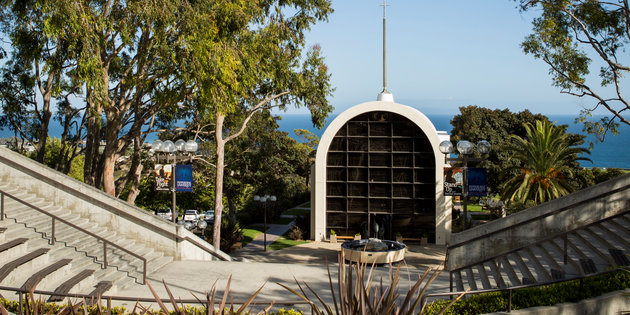

In [2]:
from IPython.display import Image
Image('https://www.pepperdine.edu/spiritual-life/chaplain/images/stauffer-chapel-and-amphitheatre.jpg')